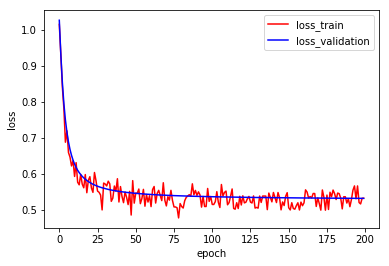

In [7]:
import numpy as np
from numpy import random,mat
import matplotlib.pyplot as plt
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

class regress(object):
    def __inti__(self):
        self.W=None
        
    def loss(self,X,y,X_validate,y_validate,batch_size):
        n_train=X.shape[0]/batch_size
        i= random.randint(0,n_train-2)
        index=batch_size*i
        X_train=X[index:index+batch_size]
        y_train=y[index:index+batch_size]        
            
        loss=np.sum(self.predict(X_train.dot(self.W))-y_train)/y_train.shape[0]
        loss_validate=np.sum(self.predict(X_validate.dot(self.W))-y_validate)/y_validate.shape[0]
        dW=X_train.T.dot(self.predict(X_train.dot(self.W)-y_train))/batch_size
        return loss,loss_validate,dW
    def train(self,X,y,X_validate,y_validate,learn_rate=0.1,iters=200,batch_size=1000):
        n_feature=X.shape[1]
        self.W = np.zeros((n_feature,1))
        loss_list = []
        loss_validate_list=[]
        for i in xrange(iters):
            loss, loss_validate, dW=self.loss(X,y,X_validate,y_validate,batch_size)
            loss_list.append(loss)
            loss_validate_list.append(loss_validate)
            self.W+=-dW*learn_rate
        return loss_list,loss_validate_list
    def predict(self,X):
        return 1.0/(1+math.e**(-X))
    pass

X_train,y_train=datasets.load_svmlight_file('/Users/taohuadao/Documents/机器学习temp/a9a',n_features=124,length=32561*125)
X_validate,y_validate=datasets.load_svmlight_file('/Users/taohuadao/Documents/机器学习temp/a9a.t',n_features=124,length=32561*125)
X_train=X_train.toarray()
X_validate=X_validate.toarray()
y_train=y_train.reshape(y_train.shape[0],1)
y_validate=y_validate.reshape(y_validate.shape[0],1)
regression=regress()
loss_list,loss_validate_list=regression.train(X_train,y_train,X_validate,y_validate)
iters=np.arange(0,200)
plt.plot(iters,loss_list,color="r",label="loss_train")
plt.plot(iters,loss_validate_list,color="b",label="loss_validation")
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()